In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 
import datetime as dt 
import os 

_today = dt.datetime.today().strftime('%Y-%m-%d')

# Get SP500 Tickers
sp500 = pd.read_csv('/Users/talhajamal/Desktop/Code/Daily_Market_Update/data/sp500.csv')
sp500_tickers = ','.join(sp500['Symbol']).replace(',',' ')

# 1 Year Data
data = yf.download(sp500_tickers, period='2y')

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=2y)')


In [2]:
# Performance Metrics
performance_metrics = {
    '1d': data['Adj Close'].pct_change(fill_method=None).tail(1) * 100,
    '1w': data['Adj Close'].pct_change(fill_method=None, periods=5).tail(1) * 100,
    '1m': data['Adj Close'].pct_change(fill_method=None, periods=21).tail(1) * 100,
    '1y': data['Adj Close'].pct_change(fill_method=None, periods=252).tail(1) * 100
}

# Find top 10 performing stocks for each period
top_performers = {period: metric.iloc[0].nlargest(10) for period, metric in performance_metrics.items()}

# Find worst 10 performing stocks for each period
worst_performers = {period: metric.iloc[0].nsmallest(10) for period, metric in performance_metrics.items()}

# df for each best period
best_one_day_performance = top_performers['1d']
best_one_week_performance = top_performers['1w']
best_one_month_performance = top_performers['1m']
best_one_year_performance = top_performers['1y']

# df for each worst period
worst_one_day_performance = worst_performers['1d']
worst_one_week_performance = worst_performers['1w']
worst_one_month_performance = worst_performers['1m']
worst_one_year_performance = worst_performers['1y']

  Ticker  1D Return
0   ANSS  18.082863
1   MRNA   4.091702
2    ALB   3.190099
3   ALLE   2.528250
4    BMY   2.009369
5   INTC   1.954117
6   INCY   1.880369
7   RVTY   1.843794
8   EXPD   1.768379
9   AMGN   1.729144


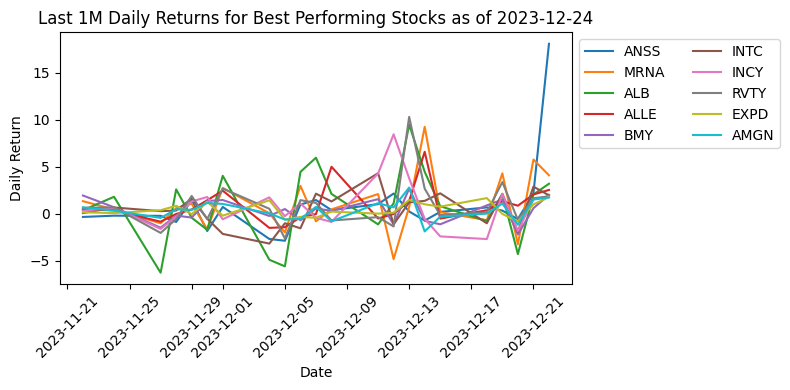

In [3]:
# Best 1D Performance
best_one_day = best_one_day_performance.reset_index()
best_one_day.columns = ['Ticker', '1D Return']
print(best_one_day)

# Plot of best performing stocks over 1 Day
plt.figure(figsize=(8,4))
for ticker, ret in best_one_day_performance.items():
    #Calculate Daily Return for last month
    plt.plot(data['Adj Close'][ticker].pct_change().tail(22) * 100, label=ticker)
plt.title('Last 1M Daily Returns for Best Performing Stocks as of '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

  Ticker  1D Return
0    NKE -11.825674
1   SNPS  -6.339738
2    VFC  -3.227480
3    CMI  -2.872949
4    KMX  -2.584349
5    CEG  -2.518803
6    RMD  -1.950691
7    WBD  -1.914703
8    CZR  -1.783089
9     RL  -1.656299


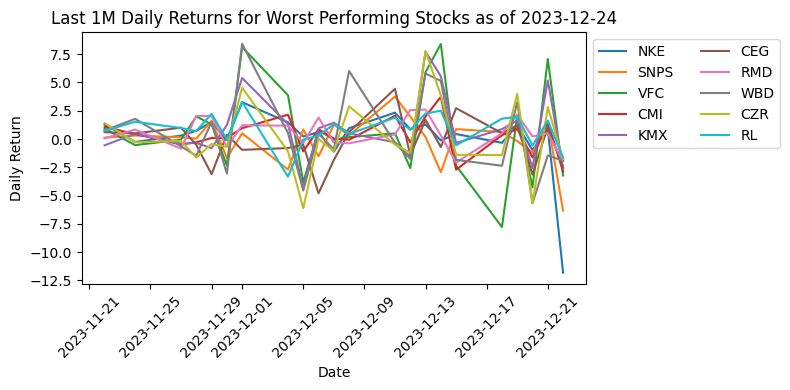

In [4]:
# Worst 1D Performance
worst_one_day = worst_one_day_performance.reset_index()
worst_one_day.columns = ['Ticker', '1D Return']
print(worst_one_day)

# Plot of best performing stocks over 1 Day
plt.figure(figsize=(8,4))
for ticker, ret in worst_one_day_performance.items():
    #Calculate Daily Return for last month
    plt.plot(data['Adj Close'][ticker].pct_change().tail(22) * 100, label=ticker)
plt.title('Last 1M Daily Returns for Worst Performing Stocks as of '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

  Ticker  1W Return
0   ANSS  21.156127
1   MRNA  10.324377
2   ILMN  10.149490
3    JCI   8.199853
4   ENPH   8.126216
5   ALLE   7.317909
6  GOOGL   6.704373
7    PFE   6.646641
8   GOOG   6.634792
9   ALGN   6.611506


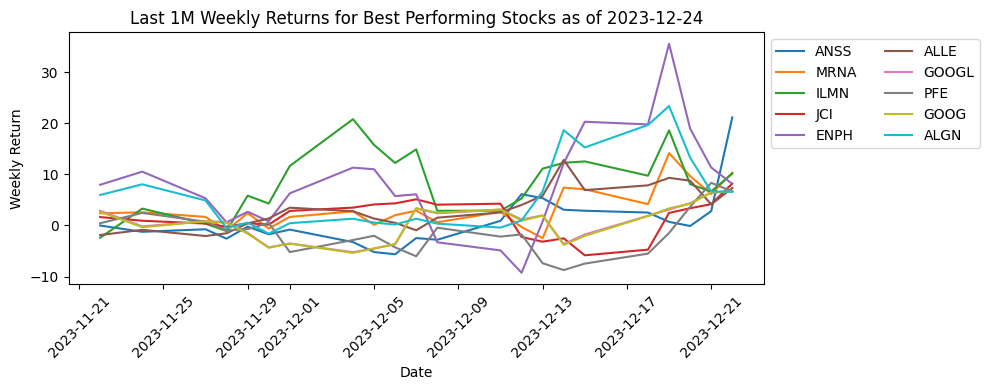

In [11]:
# Best 1W Performance
best_one_week = best_one_week_performance.reset_index()
best_one_week.columns = ['Ticker', '1W Return']
print(best_one_week)

# Plot of best performing stocks over 1 Week
plt.figure(figsize=(10,4))
for ticker, ret in best_one_week_performance.items():
    plt.plot(data['Adj Close'][ticker].pct_change(periods=5).tail(22) * 100, label=ticker)
plt.title('Last 1M Weekly Returns for Best Performing Stocks as of ' + _today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Weekly Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

  Ticker  1W Return
0    FDX -11.824099
1    NKE -11.114769
2    WBD  -8.075039
3   PARA  -7.805780
4    VFC  -6.629833
5    AON  -6.043224
6   SNPS  -5.718445
7    ADM  -5.663368
8   PAYX  -5.502993
9    MTB  -4.370966


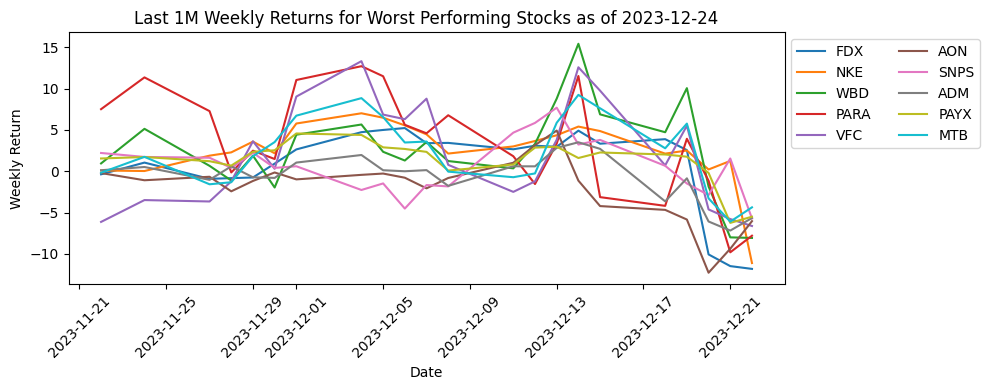

In [12]:
# Worst 1W Performance
worst_one_week = worst_one_week_performance.reset_index()
worst_one_week.columns = ['Ticker', '1W Return']
print(worst_one_week)

# Plot of best performing stocks over 1 Week
plt.figure(figsize=(10,4))
for ticker, ret in worst_one_week_performance.items():
    plt.plot(data['Adj Close'][ticker].pct_change(periods=5).tail(22) * 100, label=ticker)
plt.title('Last 1M Weekly Returns for Worst Performing Stocks as of ' + _today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Weekly Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

  Ticker  1M Return
0   NCLH  45.587215
1   BBWI  45.525158
2   ILMN  43.207853
3   ENPH  33.722564
4    BXP  31.289373
5    CCL  30.822391
6     GM  28.551175
7    DFS  28.356651
8    CMA  28.141767
9   ZION  27.869806


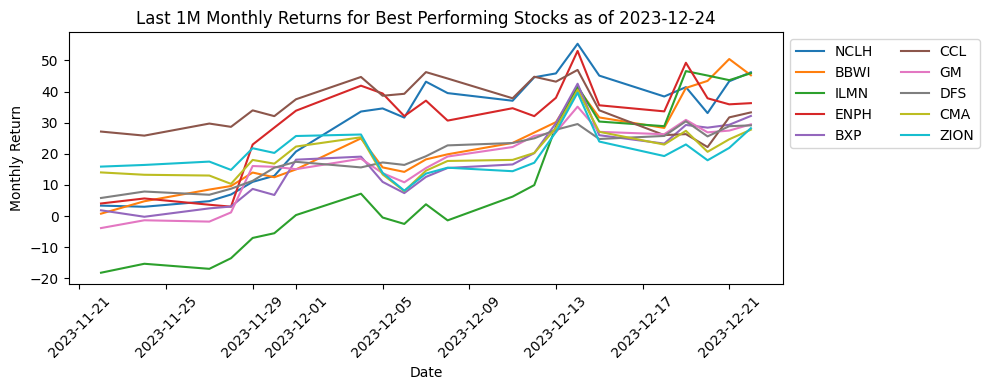

In [13]:
# Best 1M Performance
best_one_month = best_one_month_performance.reset_index()
best_one_month.columns = ['Ticker', '1M Return']
print(best_one_month)

# Plot of best performing stocks over 1 Month
plt.figure(figsize=(10,4))
for ticker, ret in best_one_month_performance.items():
    plt.plot(data['Adj Close'][ticker].pct_change(periods=22).tail(22) * 100, label=ticker)
plt.title('Last 1M Monthly Returns for Best Performing Stocks as of '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Monthly Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

  Ticker  1M Return
0   ACGL -14.089588
1     EG -12.958245
2    HUM -12.102398
3    AON -11.341114
4    AJG -10.999870
5    EXC  -9.264030
6   ORCL  -8.637303
7   SBUX  -7.888634
8     BG  -7.211979
9    CEG  -6.425962


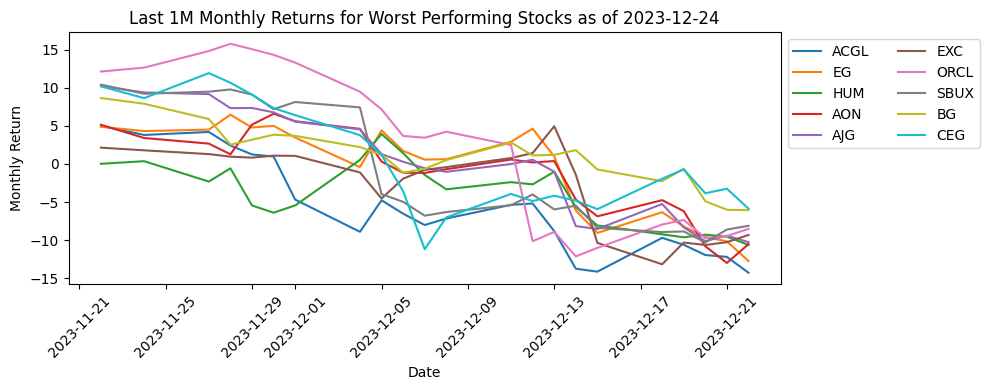

In [14]:
# Worst 1M Performance
worst_one_month = worst_one_month_performance.reset_index()
worst_one_month.columns = ['Ticker', '1M Return']
print(worst_one_month)

# Plot of best performing stocks over 1 Month
plt.figure(figsize=(10,4))
for ticker, ret in worst_one_month_performance.items():
    plt.plot(data['Adj Close'][ticker].pct_change(periods=22).tail(22) * 100, label=ticker)
plt.title('Last 1M Monthly Returns for Worst Performing Stocks as of '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Monthly Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

  Ticker   1Y Return
0   NVDA  196.052787
1   META  195.081837
2   BLDR  152.819352
3    RCL  147.461886
4   UBER  143.335953
5    PHM  125.870078
6    CCL  123.231148
7    AMD  106.264784
8   AVGO  104.464433
9    CRM  104.405211


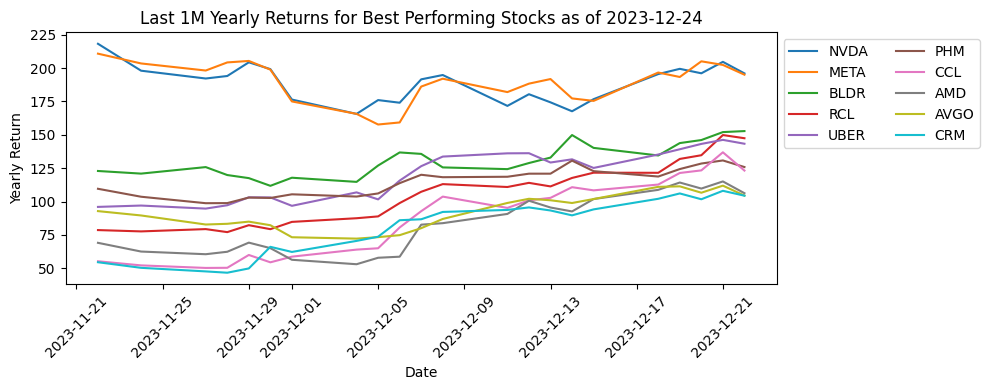

In [15]:
# Best 1Y Performance
best_one_year = best_one_year_performance.reset_index()
best_one_year.columns = ['Ticker', '1Y Return']
print(best_one_year)

# Plot of best performing stocks over 1 Year
plt.figure(figsize=(10,4))
for ticker, ret in best_one_year_performance.items():
    plt.plot(data['Adj Close'][ticker].pct_change(periods=252).tail(22) * 100, label=ticker)
plt.title('Last 1M Yearly Returns for Best Performing Stocks as of '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Yearly Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

  Ticker  1Y Return
0   ENPH -57.745190
1   MRNA -54.822890
2    FMC -48.631419
3     DG -45.170074
4    PFE -42.530822
5     EL -39.849125
6   ETSY -36.760221
7    ALB -34.919944
8   PAYC -33.437038
9    AES -31.366743


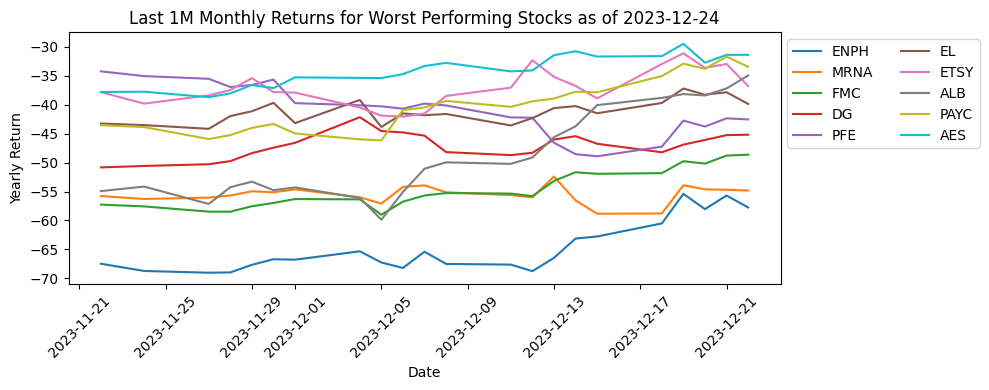

In [16]:
# Worst 1Y Performance
worst_one_year = worst_one_year_performance.reset_index()
worst_one_year.columns = ['Ticker', '1Y Return']
print(worst_one_year)

# Plot of best performing stocks over 1 Year
plt.figure(figsize=(10,4))
for ticker, ret in worst_one_year_performance.items():
    plt.plot(data['Adj Close'][ticker].pct_change(periods=252).tail(22) * 100, label=ticker)
plt.title('Last 1M Monthly Returns for Worst Performing Stocks as of '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Yearly Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()